#02-2. 데이터 전처리
목표: 올바른 결과 도출을 위해 전처리 과정을 거친 데이터로 훈련했을 때의 차이를 알고 표준점수로 특성의 스케일을 변환하는 방법 학습하기

---

## 문제: 훈련 모델이 수상한 도미 한 마리를 빙어라 예측

1. 넘파이로 데이터 준비하기

In [2]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
               10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0,
                6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

import numpy as np
# column_stack(): 전달받은 리스트를 일렬로 세운 뒤 차례대로 나란히 연결
fish_data = np.column_stack((fish_length, fish_weight))
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [3]:
# np.onces(), np_zeros(): 원하는 개수의 1과 0을 채운 배열
# np.concatenate(): 처음 차원을 따라 배열을 연결
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


2. 사이킷런으로 훈련 세트와 테스트 세트 나누기  
- train_test_split() 함수: 전달되는 리스트나 배열을 잘 섞어서 비율에 맞게 훈련 세트와 테스트 세트로 분할
- 2개의 배열을 전달하면 총 4개의 배열 반환
- 처음 2개가 입력 데이터, 뒤의 2개가 타깃 데이터

In [5]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)


(36, 2) (13, 2)


In [6]:
# 입력 데이터 배열 크기
print(train_input.shape, test_input.shape)
# 훈련 데이터 36개, 테스트 데이터 13개

(36, 2) (13, 2)


In [7]:
# 타깃 데이터 배열 크기
print(train_target.shape, test_target.shape)

(36,) (13,)


In [8]:
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


- 도미 10개, 빙어 3개
- 무작위로 데이터로 나누었기 때문에 샘플링 편향 발생
- 해결방법: stratify 매개변수에 타깃 데이터를 전달하면 클래스 비율에 맞게 데이터 분할 -> 훈련 데이터가 작거나 특정 클래스의 샘플 개수가 적을 경우 유용함


In [10]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target,
                                                                      random_state=42, stratify = fish_target)
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


- 도미 9개, 빙어 4개로 전체 훈련 데이터의 비율과 비슷하게 맞춰짐

3. 훈련 데이터로 모델 학습 & 테스트 데이터로 모델 평가

In [11]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [14]:
kn.predict([[25, 150]])

array([0.])

- 문제: 길이 25cm, 무게 150g인 생선을 도미라고 예측

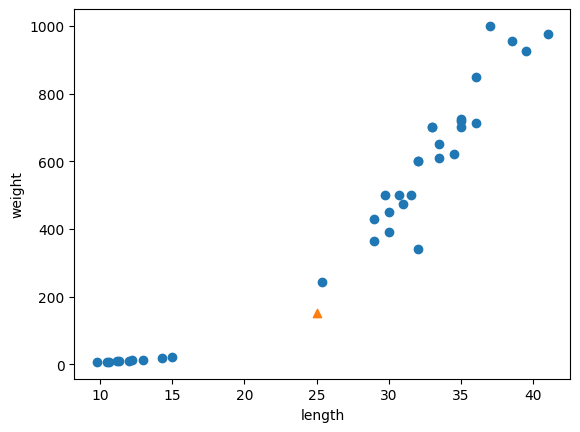

In [16]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- k-최근접 이웃은 주변의 샘플 중 다수인 클래스를 예측에 사용
- kneighbors() 메서드는 주어진 샘플에서 가장 가까운 이웃을 탐색, 이웃까지의 거리와 이웃 샘플의 인덱스를 반환

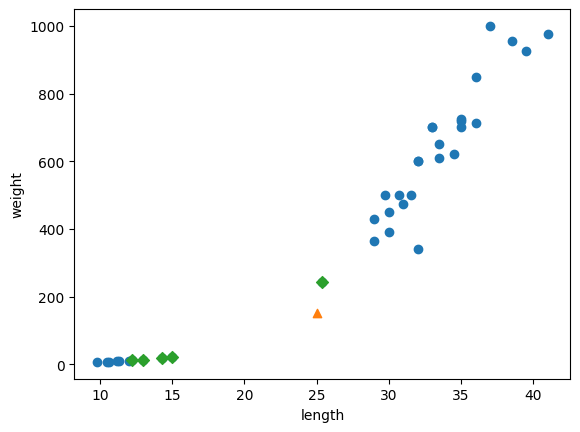

In [18]:
distances, indexes = kn.kneighbors([[25, 150]])
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
# 샘플에 가장 가까운 5개의 이웃 샘플 표시
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- 가장 가까운 이웃에 도미가 하나밖에 없기 때문에 빙어로 예측

In [19]:
print(train_input[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [20]:
print(train_target[indexes])

[[1. 0. 0. 0. 0.]]


In [21]:
# 이웃까지의 거리 반환
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


4. 기준 설정
- 가장 가까운 이웃의 거리가 92, 그 다음이 130, 138
- 산점도에서 보이는 바와 달리 빙어와의 거리가 겨우 130대
- 이유: x축은 범위가 좁고, y축은 범위가 넓기 때문
- 해결방법: x축의 범위를 동일하게 0-1,000으로 맞추기

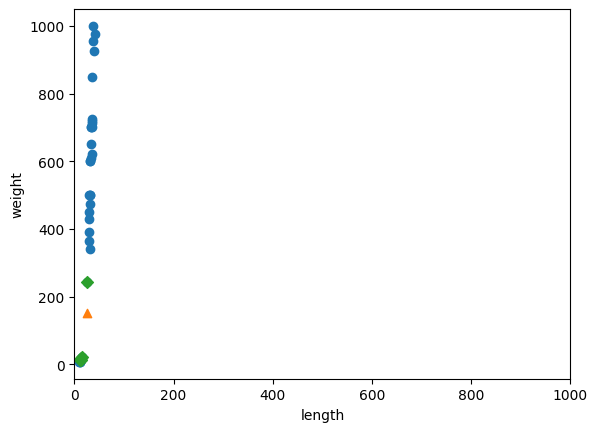

In [22]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlim(0,1000)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- x축(길이)은 가장 가까운 이웃 탐색에 크게 영향을 미치지 못함
- 오로지 y축(무게)만 고려 대상이 됨
- 데이터 전처리: k-최근접 이웃같은 알고리즘들은 샘플 간의 거리에 영향을 많이 미치므로 제대로 사용하기 위해서는 특성값을 일정한 기준으로 맞춰야 함
## 표준점수 (z-점수)
- 가장 널리 사용하는 전처리 방법 중 하나
- 각 특성값이 0에서 표준편차의 몇 배만큼 떨어져 있는지 나타냄
- 평균과 표준편차를 각 특성별로 계산하기 위해 axis=0으로 지정


In [25]:
# 평균 계산
mean = np.mean(train_input, axis=0)
# 표준편차 계산
std = np.std(train_input, axis=0)

print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [28]:
# broadcasting: 주어진 넘파이 배열의 모든 행에서 계산을 각각 해줌
train_scaled = (train_input - mean) / std

5. 전처리 데이터로 모델 훈련하기
- 표준점수로 변환한 train_scaled를 훈련 데이터로 사용
- 테스트 데이터와 새로운 샘플도 똑같이 표준점수로 변환 필요

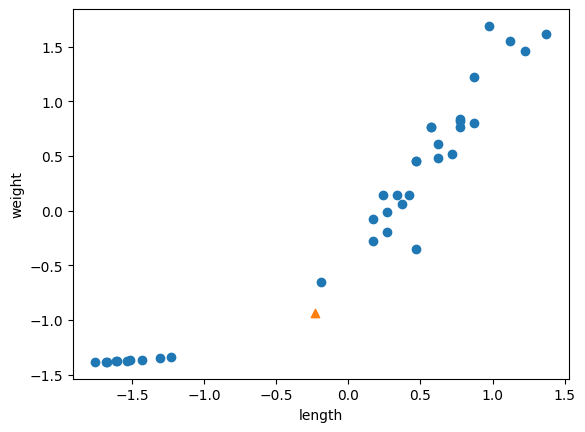

In [30]:
# 새로운 샘플 동일한 기준으로 변환
new = ([25, 150] - mean) / std
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [34]:
# 테스트 데이터 동일한 기준으로 변환
test_scaled = (test_input - mean) / std
kn.fit(test_scaled, test_target)
kn.score(test_scaled, test_target)

1.0

In [38]:
print(kn.predict([new]))

[1.]


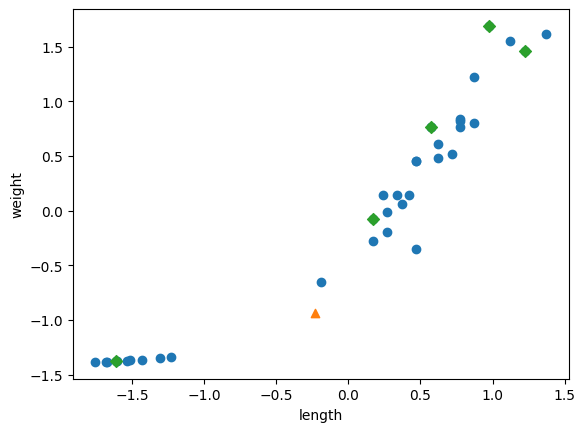

In [40]:
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()